In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import BayesianRidge
import math
from sklearn.metrics import mean_squared_error

# Real Stock Thailand 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [31]:
print(stock_name)

['KBANK', 'SCB']


In [3]:
from pandas_datareader import data as pdr
from tqdm import tqdm,trange
stock_list = ['KBANK','SCB']
stock_data = []
stock_name = []
for quote in tqdm(stock_list):
    try:
        stock_data.append(pdr.get_data_yahoo(f'{quote}.BK', start='2009-01-01', end='2019-5-18'))
        stock_name.append(quote)
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1])

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.16it/s]


In [4]:
KBANK = stock_data[0] 
SCB = stock_data[1]

In [5]:
KBANK_Train_set = KBANK[:'2017'].iloc[:,:]
KBANK_Test_set = KBANK['2017':].iloc[:,:]
SCB_Train_set = SCB[:'2017'].iloc[:,:]
SCB_Test_set = SCB['2017':].iloc[:,:]

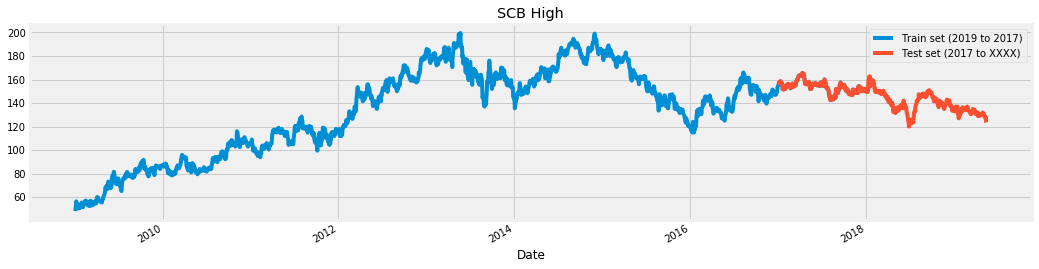

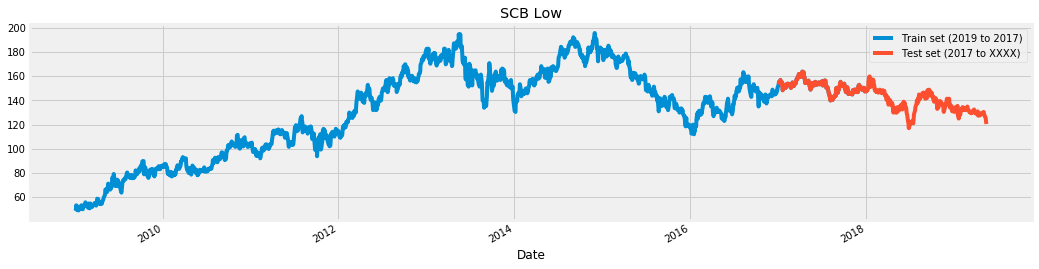

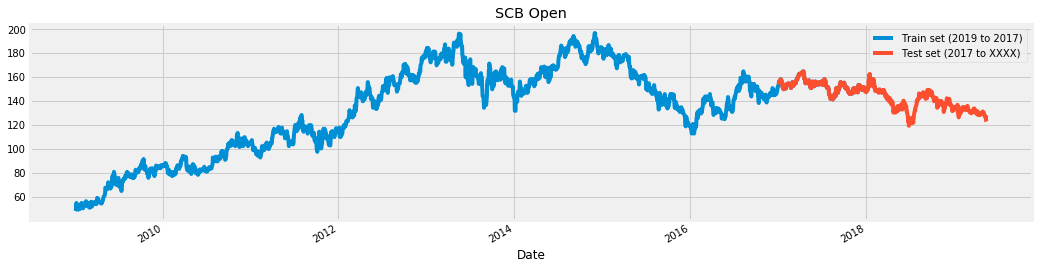

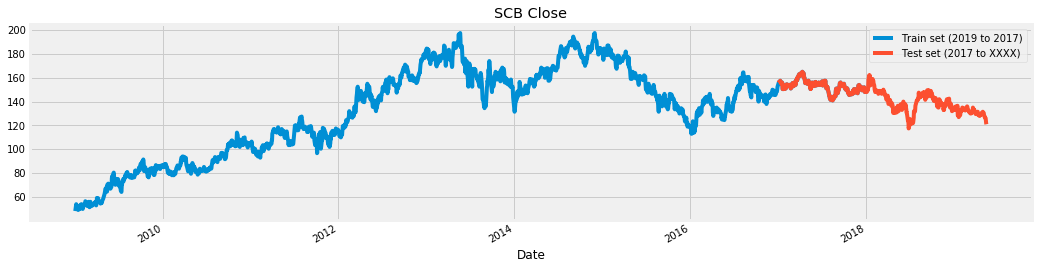

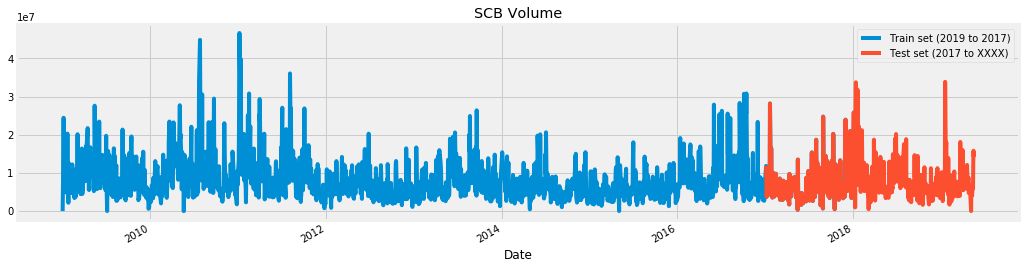

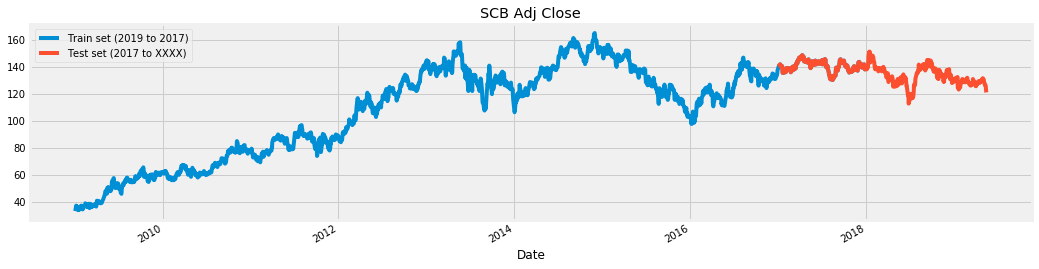

In [6]:
for a in list(stock_data[1].columns.values) :
    stock_data[1][a][:'2017'].plot(figsize=(16,4), legend = True)
    stock_data[1][a]['2017':].plot(figsize=(16,4), legend = True)
    plt.legend(['Train set (2019 to 2017)','Test set (2017 to XXXX)'])
    plt.title("SCB " + a)
    plt.show()

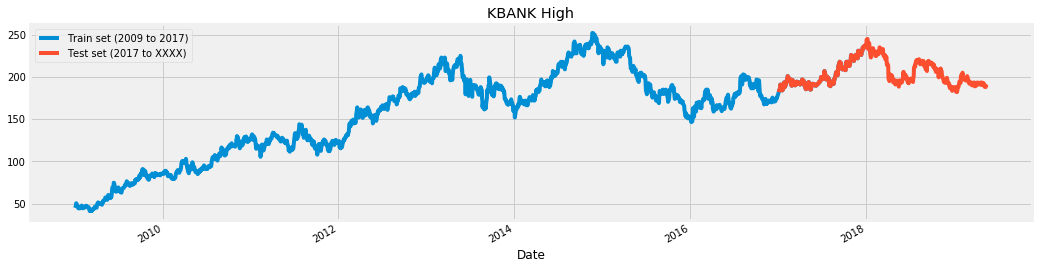

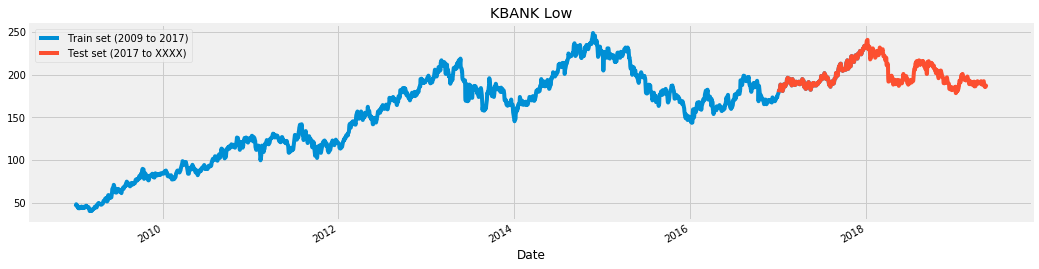

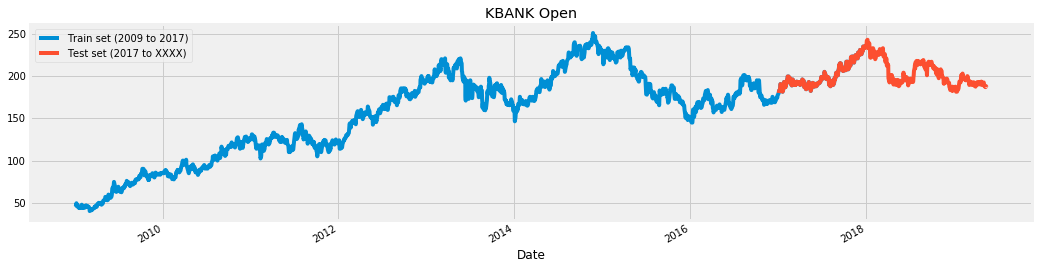

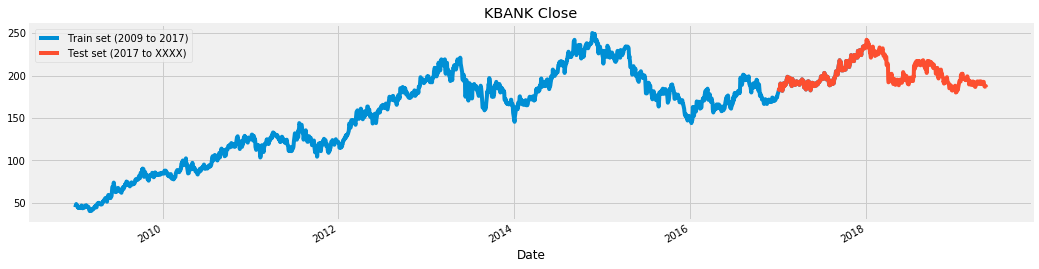

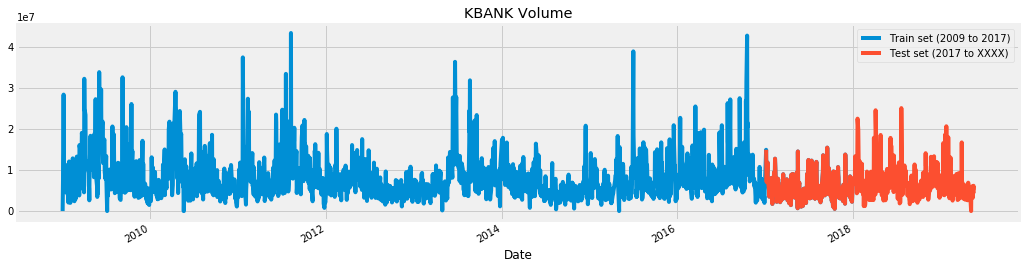

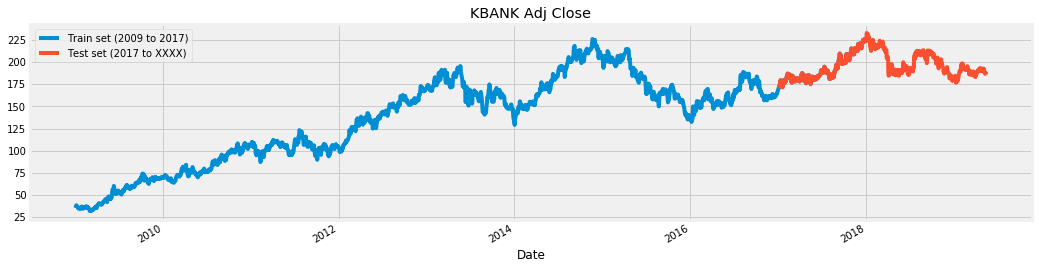

In [7]:
for a in list(stock_data[0].columns.values) :
    stock_data[0][a][:'2017'].plot(figsize=(16,4), legend = True)
    stock_data[0][a]['2017':].plot(figsize=(16,4), legend = True)
    plt.legend(['Train set (2009 to 2017)','Test set (2017 to XXXX)'])
    plt.title("KBANK " + a)
    plt.show()

In [8]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True,feat_name=None):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{feat_name[j]}(t-{i})' for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{feat_name[j]}(t)' for j in range(n_vars)]
        else:
            names += [f'{feat_name[j]}(t+{i})' for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


# Training

In [10]:
X_train = pd.concat([series_to_supervised(KBANK_Train_set.values, 30, 0,feat_name=stock_data[0].columns), series_to_supervised(SCB_Train_set.values, 30, 0,feat_name=stock_data[1].columns)], axis=1)
y_train = SCB_Train_set[30:]

In [12]:
reg_SCB_vs_KBANK = MultiOutputRegressor(AdaBoostRegressor(base_estimator=BayesianRidge(n_iter=3000),n_estimators=100))
reg_SCB_vs_KBANK.fit(X_train, y_train)

MultiOutputRegressor(estimator=AdaBoostRegressor(base_estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=3000,
       normalize=False, tol=0.001, verbose=False),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=None),
           n_jobs=None)

In [13]:
X_test = pd.concat([series_to_supervised(KBANK_Test_set.values, 30, 0,feat_name=stock_data[0].columns), series_to_supervised(SCB_Test_set.values, 30, 0,feat_name=stock_data[1].columns)], axis=1)
y_test = SCB_Test_set[30:]

In [14]:
predicted_Test = reg_SCB_vs_KBANK.predict(X_test)

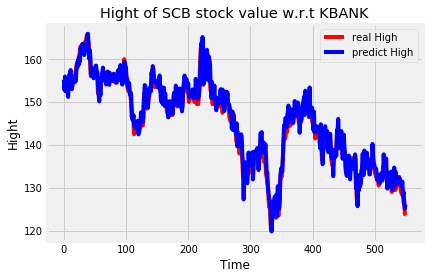

In [15]:
plt.plot(y_test['High'].values, color = 'red', label = 'real High')
plt.plot(predicted_Test[:,0], color = 'blue', label = 'predict High')
plt.title('Hight of SCB stock value w.r.t KBANK')
plt.xlabel('Time')
plt.ylabel('Hight')
plt.legend()
plt.show()

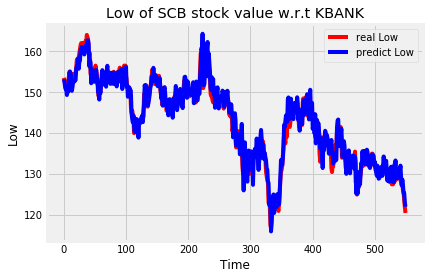

In [16]:
plt.plot(y_test['Low'].values, color = 'red', label = 'real Low')
plt.plot(predicted_Test[:,1], color = 'blue', label = 'predict Low')
plt.title('Low of SCB stock value w.r.t KBANK')
plt.xlabel('Time')
plt.ylabel('Low')
plt.legend()
plt.show()

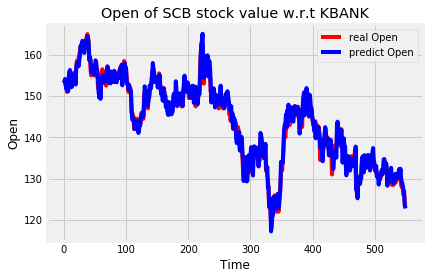

In [17]:
plt.plot(y_test['Open'].values, color = 'red', label = 'real Open')
plt.plot(predicted_Test[:,2], color = 'blue', label = 'predict Open')
plt.title('Open of SCB stock value w.r.t KBANK')
plt.xlabel('Time')
plt.ylabel('Open')
plt.legend()
plt.show()

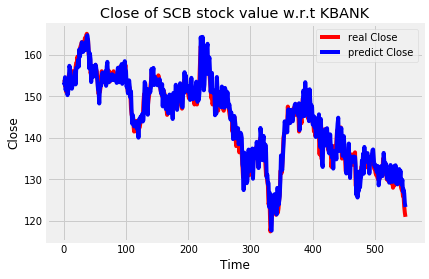

In [18]:
plt.plot(y_test['Close'].values, color = 'red', label = 'real Close')
plt.plot(predicted_Test[:,3], color = 'blue', label = 'predict Close')
plt.title('Close of SCB stock value w.r.t KBANK')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

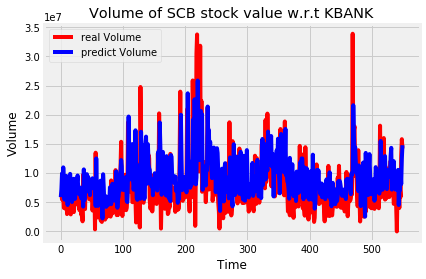

In [19]:
plt.plot(y_test['Volume'].values, color = 'red', label = 'real Volume')
plt.plot(predicted_Test[:,4], color = 'blue', label = 'predict Volume')
plt.title('Volume of SCB stock value w.r.t KBANK')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

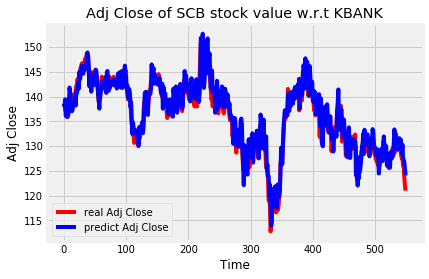

In [20]:
plt.plot(y_test['Adj Close'].values, color = 'red', label = 'real Adj Close')
plt.plot(predicted_Test[:,5], color = 'blue', label = 'predict Adj Close')
plt.title('Adj Close of SCB stock value w.r.t KBANK')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

# Mean Squared Error

In [21]:
rmse_test_High = math.sqrt(mean_squared_error(y_test['High'].values,predicted_Test[:,0]))
rmse_test_Low = math.sqrt(mean_squared_error(y_test['Low'].values,predicted_Test[:,1]))
rmse_test_Open = math.sqrt(mean_squared_error(y_test['Open'].values,predicted_Test[:,2]))
rmse_test_Close = math.sqrt(mean_squared_error(y_test['Close'].values,predicted_Test[:,3]))
rmse_test_Volume = math.sqrt(mean_squared_error(y_test['Volume'].values,predicted_Test[:,4]))
rmse_test_AdjClose = math.sqrt(mean_squared_error(y_test['Adj Close'].values,predicted_Test[:,5]))


print("The root mean squared error of High on the test set",rmse_test_High)
print("The root mean squared error of Low on the test set",rmse_test_Low)
print("The root mean squared error of Open on the test set",rmse_test_Open)
print("The root mean squared error of Close on the test set",rmse_test_Close)
print("The root mean squared error of Volume on the test set",rmse_test_Volume)
print("The root mean squared error of Adj.Close on the test set",rmse_test_AdjClose)

The root mean squared error of High on the test set 1.8962700227570963
The root mean squared error of Low on the test set 2.0223690210364977
The root mean squared error of Open on the test set 1.4042521971509536
The root mean squared error of Close on the test set 2.2536650587813765
The root mean squared error of Volume on the test set 4762088.739161321
The root mean squared error of Adj.Close on the test set 2.0793440990302834


In [54]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')